## 1. Problem Statement

   ##### . The historical data of a company such as Age, Business Travel, Education, Job Role, Distance from office and all other factors affecting attrition of employees. 

   ##### . The goal is to predict attrition of an employee using classification models i.e. LogisticRegression, DecisionTreeClassifier and RandomForestClassifier.

###  2. Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from pandas_profiling import ProfileReport
from collections import Counter

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### 3. Loading Data

In [104]:
# Importing the dataset as `data_attrition`
data_attrition = pd.read_csv('https://raw.githubusercontent.com/ukcalc/Python-Machine-Learning-Projects/main/HR-Employee-Attrition/HR%20Data%20new.csv')
data_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [3]:
data_attrition.info() # Info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

In [4]:
data_attrition.describe(include='all')  # Descriptive statistics of data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
count,23433.000000,23423,23428,23424.000000,23425,23427,23424.000000,23427,23431,23435,23433,23427.000000,23426,23427,23427.000000,23429.000000,23427,23427,23425,23423,23425.000000,23427.000000,23426,23424,23422,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000,23424
unique,NaN,2,3,NaN,4,59,NaN,8,3,23366,23419,NaN,4,73,NaN,NaN,11,5,4,1351,NaN,NaN,2,3,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,Current employee,Travel_Rarely,NaN,Research & Development,1,NaN,Life Sciences,1,23244,124269,NaN,Male,66,NaN,NaN,Sales Executive,4,Married,2342,NaN,NaN,Y,No,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company Website
freq,NaN,19714,16620,NaN,15286,2416,NaN,9701,16378,7,2,NaN,14056,480,NaN,NaN,5111,7276,10709,66,NaN,NaN,23424,16790,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5400
mean,36.936671,NaN,NaN,801.828765,NaN,NaN,2.910050,NaN,NaN,NaN,NaN,13.681777,NaN,NaN,2.733811,2.064023,NaN,NaN,NaN,NaN,14304.343821,3.887779,NaN,NaN,NaN,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577,NaN
std,9.137432,NaN,NaN,403.206166,NaN,NaN,1.024931,NaN,NaN,NaN,NaN,1186.544372,NaN,NaN,0.836860,1.105421,NaN,NaN,NaN,NaN,7102.636293,155.332904,NaN,NaN,NaN,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379,NaN
min,18.000000,NaN,NaN,102.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,2094.000000,0.000000,NaN,NaN,NaN,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,30.000000,NaN,NaN,465.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,8053.000000,1.000000,NaN,NaN,NaN,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN
50%,36.000000,NaN,NaN,802.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,14222.000000,2.000000,NaN,NaN,NaN,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN
75%,43.000000,NaN,NaN,1157.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,20460.000000,4.000000,NaN,NaN,NaN,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,NaN


### Checking columns with null

In [5]:
data_attrition.isnull().sum() #checking null per column

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [6]:
#Pre-Profile Report to have a feel of the data.
pd.options.display.max_columns = None
profile = ProfileReport(data_attrition, title='Pandas Pre Profiling Report', explorative=True)
profile.to_file("Attrition_Pre_Profile.html")

In [7]:
data_attrition.isnull().sum().sum() # checking total number of nulls present in data

352

In [8]:
len(data_attrition) # number of rows in dataset


23436

In [9]:
data_attrition.shape # Number of (records, features) of data

(23436, 37)

In [10]:
data_attrition.isnull().sum().sum() / len(data_attrition) # Calculating percentage of null values in dataset

0.01501962792285373

In [11]:
data_attrition=data_attrition.dropna() # dropping the 
data_attrition.shape # checking the rows after dropping rows having null values

(23204, 37)

## Pre-Processing Data
    
    . Removing Duplicate Rows.
    . Dropping columns with high cardinality.
    . Dropping null values.
    . Converting some categorical variables to numeric.
    

In [12]:
# Removing duplicated rows
data_attrition_dup = data_attrition[~ (data_attrition.duplicated(subset=None, keep='first') == 'True')]
data_attrition_dup                                    

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Life Sciences,1,19337,142792,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,Y,No,20,4.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23429,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Medical,1,19338,142793,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,3.0,Y,No,20,3.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23430,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Life Sciences,1,19340,142795,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,Y,No,20,3.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Medical,1,19344,142799,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Single,10883,20467.0,3.0,Y,No,20,4.0,3.0,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website


In [13]:
data_attrition.drop_duplicates(keep='first',inplace=True)
data_attrition.shape

(23190, 37)

In [15]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  object 
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  object 
 14  JobInv

In [16]:
data_attrition.select_dtypes(include=['object']).dtypes # Checking number of categorical columns

Attrition            object
BusinessTravel       object
Department           object
DistanceFromHome     object
EducationField       object
EmployeeCount        object
EmployeeNumber       object
Application ID       object
Gender               object
HourlyRate           object
JobRole              object
JobSatisfaction      object
MaritalStatus        object
MonthlyIncome        object
Over18               object
OverTime             object
PercentSalaryHike    object
Employee Source      object
dtype: object

In [17]:
# EmployeeNumber column has high cardinality and hence will not help in modeling
data_attrition['EmployeeNumber'].value_counts()[:200] 

23244    6
6325     5
10442    5
35       4
9568     4
10024    4
13411    3
12686    3
17031    3
12078    3
11470    3
1        3
1294     2
15848    2
1560     2
14705    2
800      2
3538     2
126      2
21567    2
19050    2
177      2
2396     2
5064     2
20308    2
2092     2
1826     2
903      1
10470    1
7051     1
5642     1
21518    1
6638     1
20480    1
514      1
22928    1
13566    1
5961     1
13090    1
20485    1
10515    1
21629    1
164      1
16871    1
19449    1
7324     1
5726     1
2697     1
5644     1
6529     1
3726     1
5097     1
20965    1
17632    1
5606     1
10259    1
10717    1
15245    1
1365     1
17885    1
275      1
15134    1
8115     1
11455    1
21987    1
13823    1
17932    1
23319    1
2375     1
8674     1
11065    1
14357    1
23032    1
9888     1
7923     1
2119     1
13221    1
10311    1
22469    1
22967    1
21785    1
4771     1
3345     1
609      1
491      1
4907     1
17574    1
5683     1
14313    1
3361     1
649      1

In [18]:
# Application ID column has high cardinality and hence will not help in modeling
data_attrition['Application ID'].value_counts()

133859      1
141550.0    1
141552.0    1
146669      1
141554.0    1
           ..
124315      1
146820      1
131214      1
127469      1
131616      1
Name: Application ID, Length: 23190, dtype: int64

In [19]:
data_attrition['BusinessTravel'].value_counts()

Travel_Rarely        16443
Travel_Frequently     4376
Non-Travel            2371
Name: BusinessTravel, dtype: int64

In [20]:
data_attrition['Department'].value_counts()

Research & Development    15125
Sales                      7056
Human Resources            1009
Name: Department, dtype: int64

In [22]:
data_attrition['DistanceFromHome'].value_counts()

1       2380
2       2063
2.0     1239
3       1022
10       978
7        967
9        952
8        925
1.0      897
5        803
4        694
6        681
10.0     381
9.0      373
7.0      363
16       353
8.0      345
11       335
3.0      324
23       324
4.0      320
24       320
15       295
18       287
13       272
6.0      257
19       255
25       250
29       238
20       238
21       238
17       223
5.0      220
22       219
26.0     217
28       207
12       193
29.0     191
14       190
26       178
28.0     156
16.0     147
27       147
14.0     143
25.0     140
12.0     137
20.0     137
18.0     131
11.0     126
15.0     121
24.0     110
23.0     104
19.0      96
22.0      85
17.0      77
21.0      47
27.0      47
13.0      32
Name: DistanceFromHome, dtype: int64

In [23]:
data_attrition['DistanceFromHome'].unique()

array(['1', '12', '20', '2', '4', '5', '22', '3', '10', '9', '14', '6',
       '19', '7', '23', '28', '8', '18', '11', '21', '25', '16', '13',
       '24', '27', '15', '26', '29', '17', 21.0, 5.0, 10.0, 9.0, 23.0,
       1.0, 2.0, 15.0, 29.0, 27.0, 3.0, 4.0, 26.0, 14.0, 16.0, 22.0, 18.0,
       6.0, 12.0, 25.0, 24.0, 20.0, 7.0, 8.0, 17.0, 28.0, 11.0, 19.0,
       13.0], dtype=object)

In [24]:
data_attrition['EmployeeNumber'].value_counts()

23244    6
6325     5
10442    5
35       4
9568     4
        ..
17518    1
2411     1
20228    1
14448    1
11790    1
Name: EmployeeNumber, Length: 23141, dtype: int64

In [25]:
data_attrition['Age'].value_counts()

35.0    1218
34.0    1210
36.0    1101
31.0    1079
29.0    1073
32.0     956
30.0     950
38.0     941
33.0     917
40.0     871
37.0     791
27.0     772
28.0     752
42.0     734
39.0     659
45.0     644
41.0     640
26.0     598
44.0     525
46.0     518
43.0     511
50.0     477
24.0     416
25.0     411
47.0     383
49.0     382
55.0     328
53.0     308
48.0     301
51.0     301
52.0     287
54.0     285
22.0     257
58.0     223
23.0     223
56.0     220
21.0     208
20.0     174
59.0     148
19.0     130
18.0     127
60.0      80
57.0      61
Name: Age, dtype: int64

In [26]:
data_attrition['Age'].unique()

array([41., 37., 18., 34., 24., 39., 30., 31., 20., 26., 25., 28., 36.,
       29., 27., 32., 50., 48., 53., 56., 51., 46., 19., 35., 33., 58.,
       47., 44., 21., 45., 38., 23., 22., 40., 52., 42., 49., 55., 43.,
       59., 54., 57., 60.])

In [27]:
data_attrition['EmployeeNumber'].value_counts()

23244    6
6325     5
10442    5
35       4
9568     4
        ..
17518    1
2411     1
20228    1
14448    1
11790    1
Name: EmployeeNumber, Length: 23141, dtype: int64

In [28]:
data_attrition['HourlyRate'].unique()

array(['94', '33', '41', '39', '49', '70', '50', '56', '54', '66', '57',
       '65', '82', '95', '87', '37', '81', '80', '38', '42', '43', '96',
       '91', '44', '45', '46', '75', '36', '88', '52', '53', '62', '60',
       '73', '59', '61', '64', '55', '71', '72', '77', '32', '40', '90',
       '84', '85', '76', '35', '93', '31', '98', '34', '92', '63', '51',
       '89', '58', '30', '100', '47', '83', '48', '69', '67', '68', '74',
       '78', '79', '86', '97', '99'], dtype=object)

In [29]:
data_attrition['EnvironmentSatisfaction'].value_counts()

3.0    7142
4.0    7038
1.0    4524
2.0    4486
Name: EnvironmentSatisfaction, dtype: int64

In [30]:
data_attrition['JobRole'].unique()

array(['Sales Executive', 'Manager', 'Research Director',
       'Sales Representative', 'Laboratory Technician',
       'Research Scientist', 'Manufacturing Director',
       'Healthcare Representative', 'Human Resources'], dtype=object)

In [31]:
data_attrition['JobSatisfaction'].unique()

array(['4', '3', '1', '2'], dtype=object)

In [32]:
data_attrition['MonthlyIncome'].value_counts()

2342     66
2559     54
2741     48
2610     48
2380     48
         ..
7260      8
10306     8
19658     8
9991      8
4559      7
Name: MonthlyIncome, Length: 1349, dtype: int64

In [33]:
data_attrition['OverTime'].value_counts()

No     16626
Yes     6564
Name: OverTime, dtype: int64

In [34]:
data_attrition['PercentSalaryHike'].unique()

array(['11', '14', '12', '22', '18', '13', '17', '23', '20', '19', '16',
       '15', '21', '24', '25'], dtype=object)

In [36]:
data_attrition['Employee Source'].unique()

array(['Referral', 'Company Website', 'Indeed', 'GlassDoor', 'LinkedIn',
       'Adzuna', 'Seek', 'Recruit.net', 'Jora', 'Test'], dtype=object)

In [37]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  object 
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  object 
 14  JobInv

### Pandas Pre-Profiling report shows the two columns EmployeeCount, Application ID to be unsupported.
### Since all the employees are over 18, dropping it. Standard hours is a constant and hence it has been dropped.

In [38]:
# Dropping columns which have high cardinality and have high corelation will not help in improving model
data_attrition.drop(['EmployeeCount', 'EmployeeNumber', 'Application ID', 'StandardHours', 'Over18', 'YearsAtCompany', 'YearsWithCurrManager', 'JobLevel'], axis=1, inplace=True)

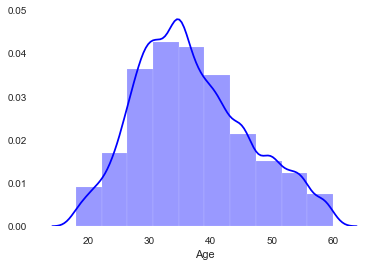

In [39]:
sns.distplot(data_attrition['Age'],hist=True,kde=True,color='b',bins=10);

In [40]:
data_attrition['Attrition'].value_counts()

Current employee         19527
Voluntary Resignation     3663
Name: Attrition, dtype: int64

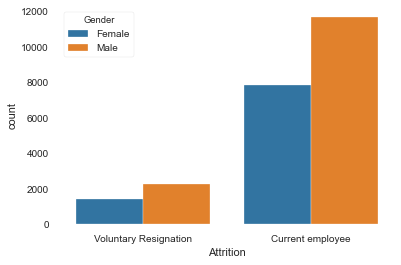

In [41]:
sns.countplot(x='Attrition',data=data_attrition,hue='Gender');

### The above histogram depicts that attrition of Male is high

In [42]:
data_attrition['BusinessTravel'].value_counts()

Travel_Rarely        16443
Travel_Frequently     4376
Non-Travel            2371
Name: BusinessTravel, dtype: int64

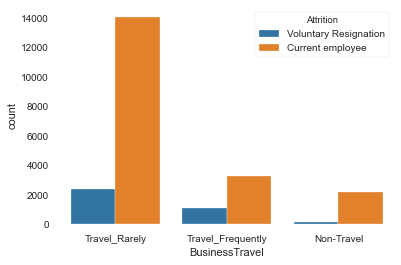

In [43]:
sns.countplot(x='BusinessTravel',data=data_attrition,hue='Attrition');

### The above histogram depicts that attrition is high for ones who rarely trevelled.

In [44]:
data_attrition.corr() # Co-relation

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
Age,1.000000,0.012778,0.209577,-0.005118,-0.005552,0.036192,0.035073,-0.007806,0.015963,0.006576,0.325684,0.000090,-0.003373,0.099685,0.099153
DailyRate,0.012778,1.000000,-0.019011,0.005777,0.010538,-0.013757,0.017166,0.010069,-0.008017,0.012023,-0.000218,-0.025568,-0.033629,-0.019449,-0.034171
Education,0.209577,-0.019011,1.000000,-0.028119,0.021088,-0.004689,0.029360,-0.006218,-0.022006,0.018450,0.071316,-0.005303,0.007677,0.042978,0.034850
EnvironmentSatisfaction,-0.005118,0.005777,-0.028119,1.000000,-0.016484,0.025315,0.000470,-0.007348,-0.029997,0.027023,-0.011930,-0.006182,0.015176,-0.004403,-0.000128
JobInvolvement,-0.005552,0.010538,0.021088,-0.016484,1.000000,-0.010767,0.001678,-0.016613,0.031520,0.018607,-0.008086,-0.013211,-0.013012,0.003037,-0.024431
MonthlyRate,0.036192,-0.013757,-0.004689,0.025315,-0.010767,1.000000,0.003427,0.005161,-0.007338,-0.005832,0.026477,0.000741,0.006247,-0.009750,0.006475
NumCompaniesWorked,0.035073,0.017166,0.029360,0.000470,0.001678,0.003427,1.000000,-0.024038,0.010856,0.004972,0.016138,-0.016524,0.015747,-0.080013,-0.045023
PerformanceRating,-0.007806,0.010069,-0.006218,-0.007348,-0.016613,0.005161,-0.024038,1.000000,-0.017584,-0.001536,0.014182,-0.012367,-0.007765,0.029847,0.015853
RelationshipSatisfaction,0.015963,-0.008017,-0.022006,-0.029997,0.031520,-0.007338,0.010856,-0.017584,1.000000,-0.044878,0.023685,0.004911,0.017962,-0.018927,0.032206
StockOptionLevel,0.006576,0.012023,0.018450,0.027023,0.018607,-0.005832,0.004972,-0.001536,-0.044878,1.000000,0.008390,0.010856,0.002505,0.051014,0.016607


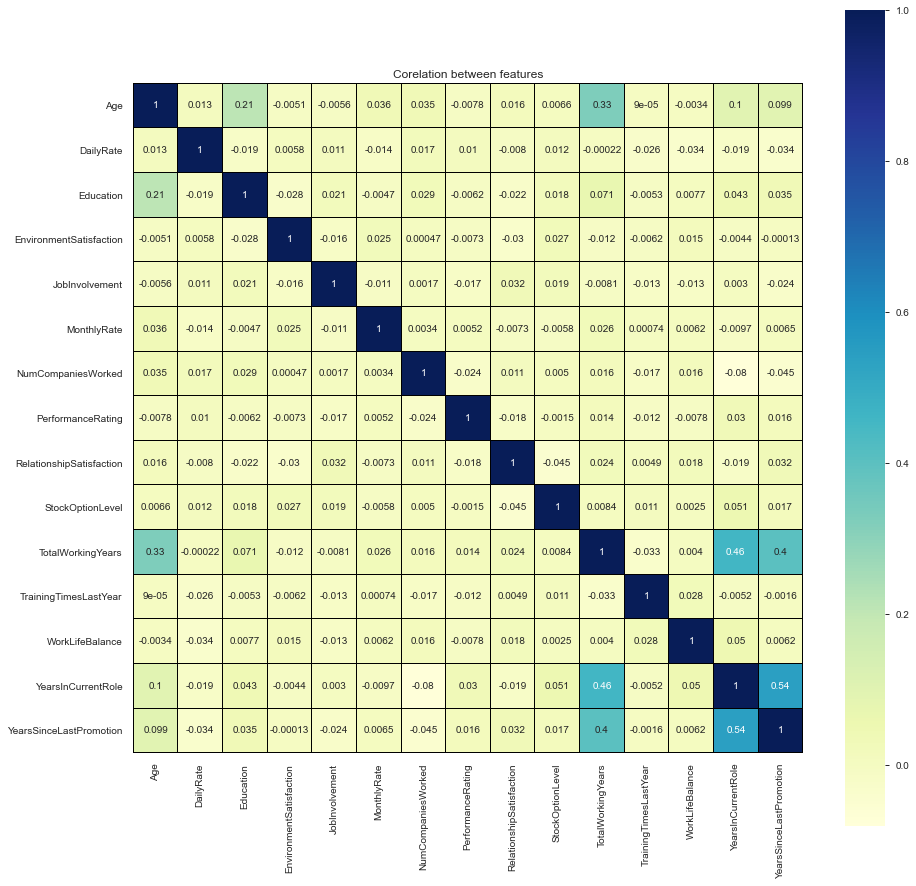

In [45]:
data_attrition_correlation = data_attrition.corr()
plt.figure(figsize =(15,15))
sns.heatmap(data_attrition_correlation,vmax=1, linewidth=.01, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title('Corelation between features')
plt.show()


In [46]:
data_attrition.shape # No. of Columns after dropping the unimportant columns

(23190, 29)

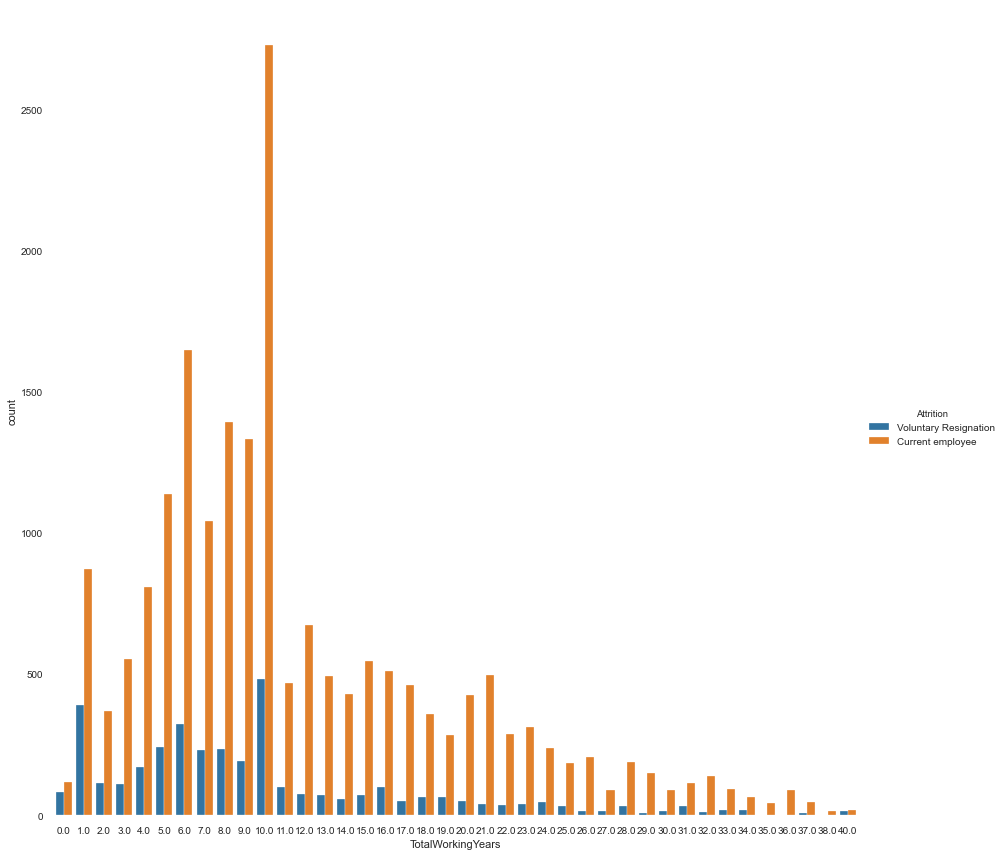

In [47]:
sns.catplot(x='TotalWorkingYears',hue='Attrition',data=data_attrition,kind='count',height=12);

### Employees having experience of 10 years and below have high attrition.

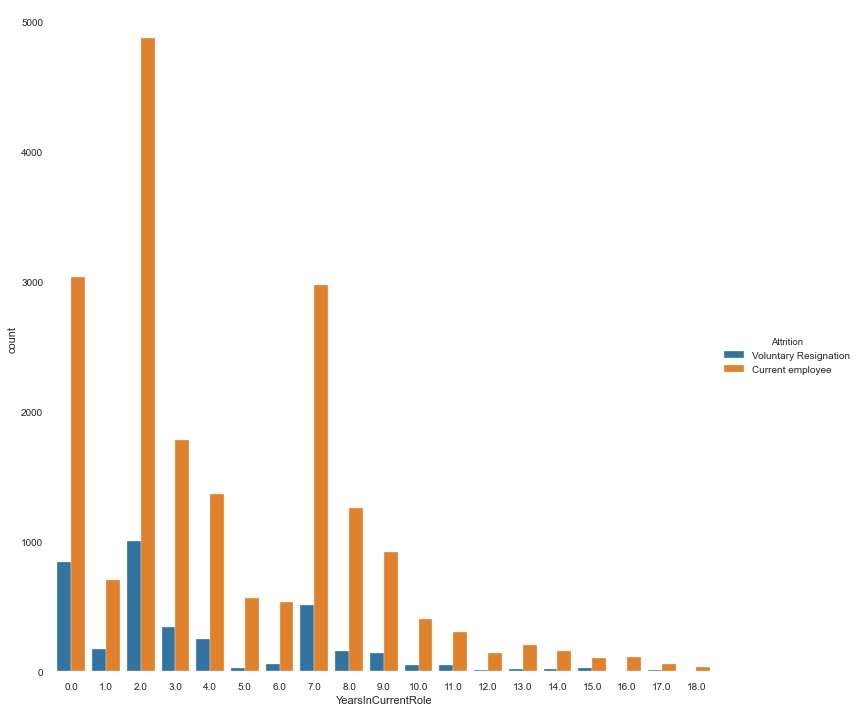

In [48]:
sns.catplot(x='YearsInCurrentRole',hue='Attrition',data=data_attrition,kind='count',height=10);

### The most attritions are for employees worked in same role for 2 years and gradually decreases after 5.

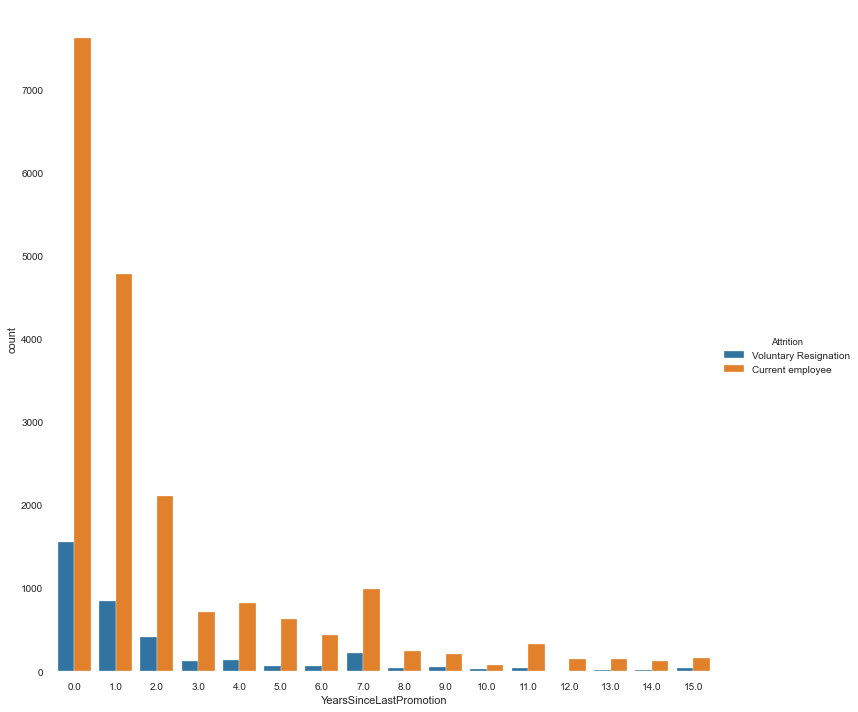

In [49]:
sns.catplot(x='YearsSinceLastPromotion',hue='Attrition',data=data_attrition,kind='count',height=10);

### Employees worked upto two years have high attrition.

In [50]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  object 
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EnvironmentSatisfaction   23190 non-null  float64
 9   Gender                    23190 non-null  object 
 10  HourlyRate                23190 non-null  object 
 11  JobInvolvement            23190 non-null  float64
 12  JobRole                   23190 non-null  object 
 13  JobSatisfaction           23190 non-null  object 
 14  Marita

### Conversion of some categorical columns to Numerical.

In [51]:
data_attrition['DistanceFromHome']=data_attrition['DistanceFromHome'].astype('int')
data_attrition['Age']=data_attrition['Age'].astype('int')
data_attrition['HourlyRate']=data_attrition['HourlyRate'].astype('int')
data_attrition['MonthlyIncome']=data_attrition['MonthlyIncome'].astype('int')
data_attrition['PercentSalaryHike']=data_attrition['PercentSalaryHike'].astype('int')

In [52]:
data_attrition.select_dtypes(include=['object']).dtypes

Attrition          object
BusinessTravel     object
Department         object
EducationField     object
Gender             object
JobRole            object
JobSatisfaction    object
MaritalStatus      object
OverTime           object
Employee Source    object
dtype: object

In [53]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder # Importing Label Encoder
le=LabelEncoder()  

In [54]:
# Fitting data
data_attrition['Attrition']=le.fit_transform(data_attrition['Attrition'])
data_attrition['BusinessTravel']=le.fit_transform(data_attrition['BusinessTravel'])
data_attrition['Department']=le.fit_transform(data_attrition['Department'])
data_attrition['EducationField']=le.fit_transform(data_attrition['EducationField'])
data_attrition['Gender']=le.fit_transform(data_attrition['Gender'])
data_attrition['JobRole']=le.fit_transform(data_attrition['JobRole'])
data_attrition['JobSatisfaction']=le.fit_transform(data_attrition['JobSatisfaction'])
data_attrition['MaritalStatus']=le.fit_transform(data_attrition['MaritalStatus'])
data_attrition['OverTime']=le.fit_transform(data_attrition['OverTime'])
data_attrition['Employee Source']=le.fit_transform(data_attrition['Employee Source'])

In [55]:
data_attrition['Attrition'].describe() # Checking the descriptive statistics of TV. Its a classification case.

count    23190.000000
mean         0.157956
std          0.364708
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Attrition, dtype: float64

In [56]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  int64  
 1   Attrition                 23190 non-null  int64  
 2   BusinessTravel            23190 non-null  int64  
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  int64  
 5   DistanceFromHome          23190 non-null  int64  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  int64  
 8   EnvironmentSatisfaction   23190 non-null  float64
 9   Gender                    23190 non-null  int64  
 10  HourlyRate                23190 non-null  int64  
 11  JobInvolvement            23190 non-null  float64
 12  JobRole                   23190 non-null  int64  
 13  JobSatisfaction           23190 non-null  int64  
 14  Marita

In [57]:
data_attrition['Attrition'].value_counts()

0    19527
1     3663
Name: Attrition, dtype: int64

In [58]:
# Checking the descriptive statistics post cleaning. Its a clear case of scaling since different columns have different scale of values.
data_attrition.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Employee Source
count,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000
mean,36.922941,0.157956,1.606813,802.246313,1.260759,9.188486,2.908754,2.242087,2.719879,0.599698,65.857740,2.730574,4.440923,1.727771,1.096809,6507.905520,14302.076757,2.688702,0.283053,15.215265,3.155239,2.713497,0.794437,11.269211,2.798879,2.761665,4.230530,2.182191,3.630185
std,9.116307,0.364708,0.665654,403.207375,0.528958,8.098394,1.024915,1.329382,1.094924,0.489970,20.335312,0.710093,2.458825,1.101444,0.730066,4706.369675,7100.061799,2.498330,0.450492,3.660005,0.362140,1.080735,0.850685,7.765751,1.289952,0.705312,3.626984,3.215755,2.653754
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,2.000000,1.000000,1.000000,2911.000000,8053.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,2.000000,0.000000,1.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,5.000000,2.000000,1.000000,4936.000000,14222.000000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.000000,3.000000,7.000000,3.000000,2.000000,8380.000000,20460.000000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,7.000000,3.000000,6.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,6.000000,4.000000,1.000000,100.000000,4.000000,8.000000,3.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,18.000000,15.000000,9.000000


In [59]:
#Post-Profile Report to have a feel of the data.
pd.options.display.max_columns = None
profile = ProfileReport(data_attrition, title='Pandas Post Profiling Report', explorative=True)
profile.to_file("Attrition_Post_Profile.html")

### Scaling numerical fields using StandardScaler

In [60]:
from sklearn.preprocessing import StandardScaler # Importing Standard Scalar 
sc = StandardScaler()
sc.fit(data_attrition) # Fitting with train data
data_attrition_sc = sc.transform(data_attrition) # transforming data

In [61]:
data_attrition['RelationshipSatisfaction'].unique()

array([1., 3., 4., 2.])

### Dropping columns having constant values.

In [62]:
drop_cols=[]
for cols in data_attrition.columns:
    if data_attrition[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
data_attrition.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  0
[]


In [63]:
print(data_attrition_sc[:1])

[[ 0.44723671  2.30886906  0.5906904   0.74343916  1.39757348 -1.0111465
  -0.88668132 -0.93435424 -0.65748374 -1.22397501  1.38394069  0.37943262
   1.04079471  1.1550806   1.23716225 -0.10940845  0.72915349  2.12598476
   1.59151084 -1.1517351  -0.4286808  -1.5855267  -0.93389918 -0.42098717
  -2.16980025 -2.49776302 -0.06356118 -0.67860827  1.26985661]]


In [64]:
data_attrition.shape

(23190, 29)

### Defining explanatory variables

In [65]:
X = data_attrition.loc[:,data_attrition.columns != 'Attrition']
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Employee Source
0,41,2,1102.0,2,1,2.0,1,2.0,0,94,3.0,7,3,2,5993,19479.0,8.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,4.0,0.0,7
1,41,2,1102.0,2,1,2.0,1,2.0,0,94,3.0,7,3,2,5993,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,4.0,0.0,7
2,41,2,1102.0,2,1,2.0,1,2.0,0,94,3.0,7,3,2,5993,19479.0,8.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,4.0,0.0,7
3,41,2,1102.0,2,1,2.0,1,2.0,0,94,3.0,7,3,2,5993,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,4.0,0.0,7
4,41,2,1102.0,2,1,2.0,1,2.0,0,94,3.0,7,3,2,5993,19479.0,8.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,4.0,0.0,7


### Defining Target Variable

In [66]:
y = data_attrition.loc[:,data_attrition.columns == 'Attrition']
y.head()

,Attrition
0,1
1,1
2,1
3,1
4,1


### Splitting main dataset into train and test data

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [71]:
print(X_train.shape) # Number of X_train rows and cols
print(y_train.shape)

(18552, 28)
(18552, 1)


In [72]:
print(X_test.shape) # Number of X_test rows and cols
print(y_test.shape)

(4638, 28)
(4638, 1)


In [73]:
y_test # Preview of y_test

,Attrition
19930,0
17920,0
19610,0
22767,0
892,0
...,...
9995,0
14867,0
7352,0
10030,0


## Building Models:
### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

### Using the Model for Prediction

In [75]:
y_pred_train_lr = logreg.predict(X_train) 

In [76]:
y_pred_train_lr

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
y_pred_test_lr = logreg.predict(X_test) 

In [78]:
y_pred_test_lr

array([0, 0, 0, ..., 0, 0, 0])

### Model evaluation

In [79]:

def classification_model_evaluation(y, y_pred, set_type=''):
    '''
    Utility/Helper method to calulate the Evaluation parameters for a classification model
    '''
    from sklearn import metrics # Importing metrics from SK-Learn
    result = {}
    
    if set_type != '':
        set_type = '_'+set_type
        
    # Accuracy score for train data set.
    result['Accuracy Score'] = metrics.accuracy_score(y, y_pred) 
    # Recall score for test data set.
    result['Recall Score'] = metrics.recall_score(y, y_pred)  
    # Precision score for test data set.
    result['Precision Score'] = metrics.precision_score(y, y_pred)                    
    # F1 score for test data set.
    result['F1 score'] = metrics.f1_score(y, y_pred)      
    # AUC score for test data set.
    result['AUC'] = metrics.roc_auc_score(y, y_pred)  

    # Returning with appending type to key and rounding value 
    return {f'{k}'+set_type: round(v, 4) for k, v in result.items()}

In [80]:
metrics_lr_test = classification_model_evaluation(y_test,y_pred_test_lr)
print('Metrics for test data : ', metrics_lr_test)

Metrics for test data :  {'Accuracy Score': 0.8357, 'Recall Score': 0.0, 'Precision Score': 0.0, 'F1 score': 0.0, 'AUC': 0.5}


In [82]:
metrics_lr_train = classification_model_evaluation(y_train,y_pred_train_lr)
print('Metrics for train data : ', metrics_lr_train)

Metrics for train data :  {'Accuracy Score': 0.8436, 'Recall Score': 0.0, 'Precision Score': 0.0, 'F1 score': 0.0, 'AUC': 0.5}


In [83]:
# Converting metrics map to DataFrame
df_train_mertrics_lr = pd.DataFrame(metrics_lr_train.items(), columns=['Metrics', 'LogisticRegression'])
df_test_mertrics_lr = pd.DataFrame(metrics_lr_test.items(), columns=['Metrics', 'LogisticRegression'])

### Decision Trees

In [84]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini', random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Using the Model for Prediction

In [85]:
y_pred_train_dt = model.predict(X_train)  

In [86]:
y_pred_test_dt = model.predict(X_test) 

### Model Evaluation using scores

In [87]:
metrics_dt_test = classification_model_evaluation(y_test,y_pred_test_dt)
print('Metrics for test data : ', metrics_dt_test)

Metrics for test data :  {'Accuracy Score': 0.9972, 'Recall Score': 0.9895, 'Precision Score': 0.9934, 'F1 score': 0.9915, 'AUC': 0.9941}


In [88]:
metrics_dt_train = classification_model_evaluation(y_train,y_pred_train_dt)
print('Metrics for train data : ', metrics_dt_train)

Metrics for train data :  {'Accuracy Score': 1.0, 'Recall Score': 1.0, 'Precision Score': 1.0, 'F1 score': 1.0, 'AUC': 1.0}


In [89]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt))

confusion_matrix.index = ['Actual Left','Actual Not Left']
confusion_matrix.columns = ['Predicted Left','Predicted Not Left']
print(confusion_matrix)

                 Predicted Left  Predicted Not Left
Actual Left                3871                   5
Actual Not Left               8                 754


In [90]:
from sklearn.metrics import accuracy_score
accuracy = (3872+751) / (3872+4+11+751)
accuracy = metrics.accuracy_score(y_test, y_pred_test_lr)
accuracy

0.8357050452781372

In [91]:
# Converting metrics map to DataFrame
df_train_mertrics_dt = pd.DataFrame(metrics_dt_train.items(), columns=['Metrics', 'DecisionTreeClassifier'])
df_test_mertrics_dt = pd.DataFrame(metrics_dt_test.items(), columns=['Metrics', 'DecisionTreeClassifier'])

### Random Forest

In [92]:
import time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state =0) # load
start_time = time.time()
rfc.fit(X_train,y_train) # fit
end_time = time.time()
time1 = end_time-start_time
print(time1)

1.9283051490783691


### Using the Model for Prediction

In [93]:
y_pred_train_rf = rfc.predict(X_train)

In [94]:
y_pred_test_rf = rfc.predict(X_test)

In [95]:
y_pred_test_rf

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
metrics_rf_test = classification_model_evaluation(y_test,y_pred_test_rf)
print('Metrics for test data : ', metrics_rf_test)

Metrics for test data :  {'Accuracy Score': 0.997, 'Recall Score': 0.9829, 'Precision Score': 0.9987, 'F1 score': 0.9907, 'AUC': 0.9913}


In [97]:
metrics_rf_train = classification_model_evaluation(y_train,y_pred_train_rf)
print('Metrics for train data : ', metrics_rf_train)

Metrics for train data :  {'Accuracy Score': 1.0, 'Recall Score': 1.0, 'Precision Score': 1.0, 'F1 score': 1.0, 'AUC': 1.0}


In [98]:

from sklearn.metrics import confusion_matrix
print('Confusion Matrix for Logistic Regression Model is : \n', confusion_matrix(y_test, y_pred_test_lr))
print('Confusion Matrix for Decision Tree Model is : \n', confusion_matrix(y_test, y_pred_test_dt))
print('Confusion Matrix for Random Forest Model is : \n', confusion_matrix(y_test, y_pred_test_rf))

Confusion Matrix for Logistic Regression Model is : 
 [[3876    0]
 [ 762    0]]
Confusion Matrix for Decision Tree Model is : 
 [[3871    5]
 [   8  754]]
Confusion Matrix for Random Forest Model is : 
 [[3875    1]
 [  13  749]]


In [99]:
# Converting metrics map to DataFrame
df_train_mertrics_rf = pd.DataFrame(metrics_rf_train.items(), columns=['Metrics', 'RandomForestClassifier'])
df_test_mertrics_rf = pd.DataFrame(metrics_rf_test.items(), columns=['Metrics', 'RandomForestClassifier'])

### Hyper Parameter Tuning

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [101]:
y_pred_train_dt_CV = grid_search.predict(X_train)
y_pred_train_dt_CV

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
y_pred_test_dt_CV = grid_search.predict(X_test)
y_pred_test_dt_CV

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
metrics_dt_test_CV = classification_model_evaluation(y_test,y_pred_test_dt_CV)
print('Metrics for test data : ', metrics_dt_test_CV)

Metrics for test data :  {'Accuracy Score': 0.9961, 'Recall Score': 0.9895, 'Precision Score': 0.9869, 'F1 score': 0.9882, 'AUC': 0.9935}


In [108]:
metrics_dt_train_CV = classification_model_evaluation(y_train,y_pred_train_dt_CV)
print('Metrics for test data  CV: ', metrics_dt_train_CV)

Metrics for test data  CV:  {'Accuracy Score': 1.0, 'Recall Score': 1.0, 'Precision Score': 1.0, 'F1 score': 1.0, 'AUC': 1.0}


In [109]:
# Converting metrics map to DataFrame
df_train_mertrics_dt_CV = pd.DataFrame(metrics_dt_train_CV.items(), columns=['Metrics', 'DecisionTreeClassifier_Grid_CV'])
df_test_mertrics_dt_CV = pd.DataFrame(metrics_dt_test_CV.items(), columns=['Metrics', 'DecisionTreeClassifier_Grid_CV'])

In [110]:
# Merginf Test metrics df
test_mertrics = df_test_mertrics_lr.merge(df_test_mertrics_dt, on='Metrics').merge(
                    df_test_mertrics_rf, on='Metrics').merge(
                    df_test_mertrics_dt_CV, on='Metrics').set_index(keys='Metrics').transpose()
test_mertrics

Metrics,Accuracy Score,Recall Score,Precision Score,F1 score,AUC
LogisticRegression,0.8357,0.0000,0.0000,0.0000,0.5000
DecisionTreeClassifier,0.9972,0.9895,0.9934,0.9915,0.9941
RandomForestClassifier,0.9970,0.9829,0.9987,0.9907,0.9913
DecisionTreeClassifier_Grid_CV,0.9961,0.9895,0.9869,0.9882,0.9935


In [111]:
# Merginf Train metrics df
train_mertrics = df_train_mertrics_lr.merge(df_train_mertrics_dt, on='Metrics').merge(
                    df_train_mertrics_rf, on='Metrics').merge(
                    df_train_mertrics_dt_CV, on='Metrics').set_index(keys='Metrics').transpose()
train_mertrics

Metrics,Accuracy Score,Recall Score,Precision Score,F1 score,AUC
LogisticRegression,0.8436,0.0,0.0,0.0,0.5
DecisionTreeClassifier,1.0000,1.0,1.0,1.0,1.0
RandomForestClassifier,1.0000,1.0,1.0,1.0,1.0
DecisionTreeClassifier_Grid_CV,1.0000,1.0,1.0,1.0,1.0


### Conclusions:

###### 1. RandomForestClassifier is the best-fit model with accuracy score of 0.9972 and precision score of 0.9987 and good Recall Score of 98.56%
###### 2. DecisionTreeClassifier and RandomForestClassifier are marginally overfitted model.
###### 3. Hyperparameter tuning slightly increases the Recall and F1 scores. Since the model is  99% accurate, there is not much need of tuning.
###### 4. Variables with high colinearity were systematically dropped and found to have no affect on the model hence to economise resources, such                     variables have been dropped from the model.
##### 5. It is suggested to have the prediction modelling done on some more data.
        